In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ya_pca.toy_data import rand_factor_model
from ya_pca.PCA import PCA
from ya_pca.viz import scree_plot

In [2]:
rank_true = 5
X, out = rand_factor_model(n_samples=80, n_features=20, rank=rank_true, sigma=1,
                           m=1.5, random_state=213)
print(X.shape)

(80, 20)


# Basic usage

In [3]:
pca = PCA(n_components=10).fit(X)

print('Primary PCA output')
print(pca.loadings_.shape) # right singular vectors of centered X
print(pca.svals_.shape) # singular values of centered X
print(pca.scores_.shape) # left singular values of centered X
print(pca.unnorm_scores_.shape) # if X_centered = UDV^T then this is UD = XV

#  scores are orthonormal, unnorm_scores are not
# print(np.allclose(pca.scores_.T @ pca.scores_, np.eye(pca.scores_.shape[1])))
# print(np.allclose(pca.unnorm_scores_.T @ pca.unnorm_scores_, np.eye(pca.unnorm_scores_.shape[1])))

Primary PCA output
(20, 10)
(10,)
(80, 10)
(80, 10)


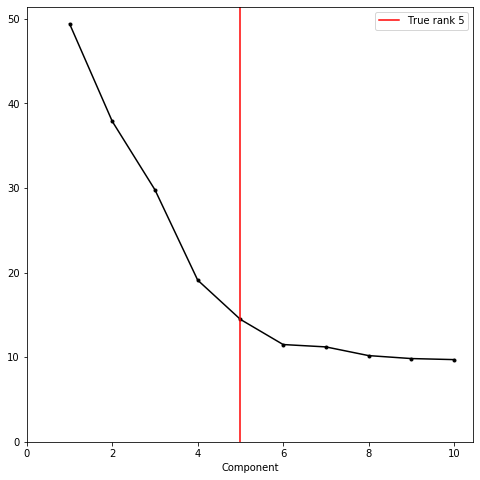

In [4]:
# scree plot
plt.figure(figsize=(8, 8))
scree_plot(pca.svals_, color='black')
plt.ylim(0)
plt.axvline(rank_true, label='True rank {}'.format(rank_true), color='red')
plt.legend()

data means [-0.1782698  -0.11648518 -0.09394381  0.2764224   0.0586959  -0.30172556
 -0.06930655  0.48293837  0.36740629  0.23701416  0.01434563  0.08121302
 -0.20246461  0.09394303 -0.47127313  0.55913949 -0.26573957  0.03248517
 -0.099757   -0.66707817]
metadata {'shape': (80, 20), 'svd_runtime': 0.002463817596435547}


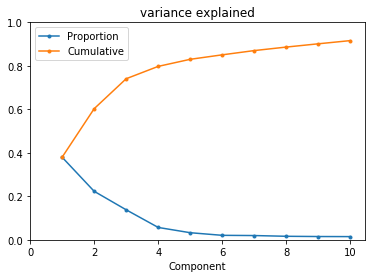

In [5]:
print('data means', pca.center_)

plt.title("variance explained")
scree_plot(pca.var_expl_prop_, label='Proportion')
scree_plot(pca.var_expl_cum_, label='Cumulative')
plt.ylim(0, 1)
plt.legend()

print('metadata', pca.metadata_)

In [7]:
# sklearn compatibility
proj = pca.transform(X)
print(np.allclose(proj, pca.unnorm_scores_))


True


# rank selection

In [9]:
pca = PCA(n_components='minka').fit(X)
print('Est n comp', pca.n_components_, 'runtime', pca.metadata_['rank_sel_runtime'])

pca = PCA(n_components='bi_cv').fit(X)
print('Est n comp', pca.n_components_, 'runtime', pca.metadata_['rank_sel_runtime'])

pca = PCA(n_components='rmt_threshold', rank_sel_kws={'thresh_method': 'dg'}).fit(X)
print('Est n comp', pca.n_components_, 'runtime', pca.metadata_['rank_sel_runtime'])

# soft impute is slow!
pca = PCA(n_components='rmt_threshold', rank_sel_kws={'thresh_method': 'dg',
                                                      'noise_est': 'cv_soft_impute'}).fit(X)
print('Est n comp', pca.n_components_, 'runtime', pca.metadata_['rank_sel_runtime'])

# print(pca.rank_sel_out_['noise_estimate'])

Est n comp 5 runtime 0.0051288604736328125
Est n comp 5 runtime 0.002820730209350586
Est n comp 4 runtime 0.005707740783691406
Est n comp 4 runtime 5.5196921825408936


In [13]:
# following sklearn convenctions, quantities estimated from the data end in a _
print('how to estimate the components', pca.n_components)
print('the estimated number of components', pca.n_components_)

how to estimate the components rmt_threshold
the estimated number of components 4
